<a href="https://colab.research.google.com/github/bymar/bts-impact/blob/main/mgas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Pop Hits Through The Years - An analysis of BTS impact

**Data Dictionary**

| Variable | Definition                                 | Key                                            | Notes                                                                                                                                       |
|----------|--------------------------------------------|------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------|
| index | music id in the table |   |   |
| title   |  Title of the song  |    |    |
| artist/s  | The artist who sang or covered or made the instrumental of the song |   |   |
| danceability    |  How suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat  |   |    |
| energy    | Perceptual measure of intensity and activity based on its dynamic range, perceived loudness, timbre, onset |  |  |
| key  |  Key the track is in. Integers map to pitches using standard Pitch Class notation. |  |  |
| loudness  | Overall loudness of a track in decibels. Loudness values are averaged across the entire track. Values |  |  |
| mode  | Type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0 |  |  |
| speechiness |  Detects the presence of spoken words in a track. The more exclusively speech-like the recording, the closer to 1.0 the |  |  |
| acousticness | Confidence measure of whether the track is acoustic. Values range from 0.0 to 1.0. 1.0 represents high |  |  |
| valence | Musical positiveness conveyed by a track. Values measure from 0.0 to 1.0. Tracks with high valence sound more |  |  |
| tempo | Overall estimated tempo of a track in beats per minute. |  |  |
| duration_ms | Duration of the track in milliseconds. |  |  |
| time_signature | Estimated overall time signature of a track. The time signature is a notational convention to specify how many beats |  |  |



O dataset escolhido mostra dados das músicas que mais fizeram sucesso na Coreia do Sul nos anos de 1990, e de 2000 a 2021. Nestes 31 anos, o K-POP (genero musical originado no país conhecido por ser uma grande mescla de diversos outros generos como Hip-Hop, Rap, Jazz, R&B, ter uma grande influência da cultura negra e ser muito caracterizado também por seu diferencial nas produções visuais) passou por 3 diferentes gerações de grupos.

Essa analise, irá focar na 2a geração, que teve um grande marco com a estreia e com o *boom * de impacto e sucesso do grupo BTS (Bangtan Sonyeondan,방탄소년단), que após seu segundo ano de lançamento, tiveram um crescimento gigantesco, tanto na Coreia do Sul, quanto no mundo. Os anos de maior destaque ao longo desse trabalho serão a partir de 2015, com uma breve comparação com 2013, para entender as diferenças de antes de seu grande sucesso, com atualmente,

---
obs.: Apesar de ser uma grande quantidade de tabelas, todas elas possuem a mesma quantidade e a mesmas colunas.









```
KPOP CENSUS:
```

###### https://www.reddit.com/r/kpop/wiki/census/

```
How BTS Became One of the Most Popular Bands in History:
```
###### https://www.newyorker.com/culture/culture-desk/joining-the-bts-army




# Utils

In [ ]:
import numpy as np
import pandas as pd

from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# this code is from the kaggle where the dataset is! ele coloca os nomes do csv em um dict
# em seguida, faz um novo dict para que se poxa chamar a tabela como ano desejado
header90 = "KPopHits"
footer90 = "s.csv"
header1 = "KPopHits200"
header10 = "KPopHits20"
footer = ".csv"
labels = {}    #dictionary for the labels of a dataset and their respective csv file

for x in range(23):
    if x == 0:
        j = 90
        labels[str(j)] = header90 + str(j) + footer90
    elif x > 0 and x < 11:
        if x == 1:
            j = 0
        labels["200" + str(j)] =  header1 + str(j) + footer
    else:
        labels["20" + str(j)] =  header10 + str(j) + footer

    if x != 0:
        j += 1

print(labels)

{'90': 'KPopHits90s.csv', '2000': 'KPopHits2000.csv', '2001': 'KPopHits2001.csv', '2002': 'KPopHits2002.csv', '2003': 'KPopHits2003.csv', '2004': 'KPopHits2004.csv', '2005': 'KPopHits2005.csv', '2006': 'KPopHits2006.csv', '2007': 'KPopHits2007.csv', '2008': 'KPopHits2008.csv', '2009': 'KPopHits2009.csv', '2010': 'KPopHits2010.csv', '2011': 'KPopHits2011.csv', '2012': 'KPopHits2012.csv', '2013': 'KPopHits2013.csv', '2014': 'KPopHits2014.csv', '2015': 'KPopHits2015.csv', '2016': 'KPopHits2016.csv', '2017': 'KPopHits2017.csv', '2018': 'KPopHits2018.csv', '2019': 'KPopHits2019.csv', '2020': 'KPopHits2020.csv', '2021': 'KPopHits2021.csv'}


In [ ]:
# dict com cada um dos csv!
songs = {}

key_list = list(labels.keys())
val_list = list(labels.values())
for x in range(23):
    songs[key_list[x]] = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/kpop/"+val_list[x], encoding='utf-8')

# songs['2000']

In [ ]:
kpophits = 0
for num in range(23):
  if num == 0:
    year = 90
    nineties = songs[str(year)]
    kpophits += len(nineties)
  elif num > 0 and num < 11:
    if num == 1:
      year = 0
    twothousand = songs['200'+str(year)]
    kpophits += len(twothousand)
  else:
    twoten = songs['20'+str(year)]
    kpophits += len(twoten)

  if num != 0:
        year += 1

print("Quantidade total de músicas",kpophits)


Quantidade total de músicas 797


In [ ]:
songs['2015'].head()

,Unnamed: 0,title,artist/s,danceability,energy,key,loudness,mode,speechiness,acousticness,valence,tempo,duration_ms,time_signature
0,0,View,SHINee,0.728,0.801,6,-4.428,0,0.0439,0.04000,0.656,123.953,190821,4
1,1,BANG BANG BANG,BIGBANG,0.690,0.843,1,-2.949,1,0.0534,0.01670,0.428,135.010,220178,4
2,2,LOVE ME RIGHT,EXO,0.625,0.830,0,-2.330,1,0.0764,0.00266,0.757,110.040,205129,4
3,3,Dope,BTS,0.579,0.896,10,-2.781,0,0.2240,0.02720,0.678,153.991,240021,4
4,4,I,"TAEYEON, Verbal Jint",0.506,0.788,9,-2.372,1,0.0324,0.06660,0.233,89.993,206039,4


In [ ]:
songs['2015'].columns

Index(['Unnamed: 0', 'title', 'artist/s', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

In [ ]:
songs['2021'].shape

(50, 14)

# Probabilidade Simples

Qual a probabilidade de ser uma música de BTS?

In [ ]:
btsHits = 0
for num in range(23):
  if num == 0:
    year = 90
    nineties = songs[str(year)]
    btsHits += len(nineties[nineties['artist/s'] == 'BTS'])
  elif num > 0 and num < 11:
    if num == 1:
      year = 0
    twothousand = songs['200'+str(year)]
    btsHits += len(twothousand[twothousand['artist/s'] == 'BTS'])
  else:
    twoten = songs['20'+str(year)]
    btsHits += len(twoten[twoten['artist/s'] == 'BTS'])

  if num != 0:
        year += 1

bts = btsHits / kpophits

print("A probabilidade de ser uma música de BTS é de " + str(round(bts*100, 2)) + "%")


A probabilidade de ser uma música de BTS é de 1.88%


Qual a probabilidade de uma música de BTS estar nos hits entre sua estreia (2013) e antes 2015?

In [ ]:
thirteen = songs['2013']
fourteen = songs['2014']

before = ((len(thirteen[thirteen['artist/s'] == 'BTS'])) +
          len(fourteen[fourteen['artist/s'] == 'BTS'])) / (len(thirteen) + len(fourteen))

print("Probabilidade de ser uma música do BTS era de " + str(before*100) + "%")


Probabilidade de ser uma música do BTS era de 0.0%


Nesse mesmo periodo, qual era a probabilidade uma música do grupo EXO estar entre os hits?


O grupo EXO (divido em EXO-K, coreia, e EXO-M, china), que estreiou em 2012, pela empresa SM, uma das 3 maiores empresas de entretenimento asiaticas da época estava em grande alta. O grupo ainda era composto por seus 12 integrantes da formação original, antes de passar escandalos judiciais entre membros do grupo e empresa, e sair 2 do grupo.
Atualmente, o grupo está com 9 integrantes.

In [ ]:
exo = ((len(thirteen[thirteen['artist/s'] == 'EXO'])) +
          len(fourteen[fourteen['artist/s'] == 'EXO'])) / (len(thirteen) + len(fourteen))
print("Probabilidade de ser uma música do EXO era de ",round(exo*100, 4),"%")

Probabilidade de ser uma música do EXO era de  1.6949 %


Qual a probabilidade de ser ARMY (fã de BTS) em 2015?

In [ ]:
# referencia: K-POP CENSUS 2015
# https://www.reddit.com/r/kpop/comments/3hdzno/reddit_kpop_census_2015/

army = 726 / 3426
print("A probabilidade de ser ARMY em 2015 era de",round(army*100, 2),"%")

A probabilidade de ser ARMY em 2015 era de 21.19 %


Qual a probabilidade de ser ARMY em 2022?

In [ ]:
# referencia: K-POP CENSUS 2022
# https://www.reddit.com/r/kpop/comments/xq66vi/reddit_kpop_census_results_2022/

armyNow = 1246 / 5096
print("A probabilidade de ser ARMY hoje é de",round(armyNow*100, 2),"%")

A probabilidade de ser ARMY hoje é de 24.45 %


Dados de 2014 e 2013 não foram encontrados. Mas um breve comparativo da quantidade de seguidores que BTS tinha em suas redes sociais em sua época de debut, com a quantidade que tem a agora, pode ver a grande diferença que se tem.

https://www.quora.com/How-many-followers-did-BTS-have-on-Twitter-when-they-first-debuted-like-first-month-year

# Probabilidade da União

Em 2018, ano que BTS lançou uma serie de 3 albuns chamada Love Yourself (Love Yourself 承 Her, Love Yourself 轉 Tear, Love Yourself 結 Answer), dois deles ficaram com a segunda e terceira maiores vendas no mundo, passando de grandes artistas da industria do Pop como Ed Sheeran, Ariana Grande, etc.

Com toda a atenção do mundo se voltando para os 7 membros do grupo, a trilogia Love Yourself foi uma grande história de como eles estavam lidando com toda a repercução. Os albuns trazem músicas sobre que mostram a jornada na construção do amor próprio e de sua propria identidade.

Mais um pouco sobre as músicas, referências encontradas nelas:

https://medium.com/revolutionaries/love-yourself-bts-and-the-psychology-of-self-love-4afb9658f1f6


```
 Love Yourself 結 Answer
```
https://www.youtube.com/playlist?list=PL-eVSSxdwRmy7LU6pMt5qg0AKFzFIjvE4

Levando isso em consideração, qual a probabilidade de no ano de 2018, as músicas de hit ser uma música de BTS ou música com indicação de valência alta?

In [ ]:
eighteen = songs['2018']

positivity = len(eighteen[(eighteen['artist/s'] == 'BTS') | (eighteen['valence'] > eighteen['valence'].median())])
positivityProb = positivity/len(eighteen)

print("Probabilidade é de "+ str(round((positivityProb*100), 2)) + "%")

Probabilidade é de 51.95%


# Probabilidade da Intersecção

BTS ficou muito conhecido por suas longas, originando um audio que ficou famoso na rede social TikTok:


```
"Hey, can i show you this BTS song?" "How long is it?"
"Is 4 min and.."
"And?? There is more??? My boy u still going? Thats a compose sentece"
```
https://www.youtube.com/watch?v=gWPigLBqpVs

Assim, qual a probabilidade de ser uma música de BTS e ser uma música com mais de 4 minutos?


In [ ]:
# util, definindo uma constante

FOUR_MINUTES = 240000

In [ ]:
# Geral:

btsLongSongs = 0
for num in range(23):
  if num == 0:
    year = 90
    btsLongSongs += len(nineties[(nineties['artist/s'] == 'BTS') & (nineties['duration_ms'] > FOUR_MINUTES)])
  elif num > 0 and num < 11:
    if num == 1:
      year = 0
    twothousand = songs['200'+str(year)]
    btsLongSongs += len(twothousand[(twothousand['artist/s'] == 'BTS') & (twothousand['duration_ms'] > FOUR_MINUTES)])
  else:
    twoten = songs['20'+str(year)]
    btsLongSongs += len(twoten[(twoten['artist/s'] == 'BTS') & (twoten['duration_ms'] > FOUR_MINUTES)])

  if num != 0:
        year += 1

probBtsLongSong = btsLongSongs/kpophits
print("Probabilidade é de " + str(round((probBtsLongSong*100), 2)) + "%")


Probabilidade é de 0.5%


In [ ]:
# Contando apenas após o debut, ou seja, apos ano seu ano de estreia (2013)

btsLongSongsDebut = 0
tableSum = 0
for num in range(23):
  if num > 13:
    if num == 14:
      year = 13
    twoten = songs['20'+str(year)]
    btsLongSongsDebut += len(twoten[(twoten['artist/s'] == 'BTS') & (twoten['duration_ms'] > FOUR_MINUTES)])
    tableSum += len(twoten)

  if num != 0:
        year += 1

probAfterDebut = btsLongSongsDebut/tableSum

print("Probabilidade após a estreia de BTS é de " + str(round((probAfterDebut*100), 2)) + "%")

Probabilidade após a estreia de BTS é de 1.01%


In [ ]:
# 2015, ano de anscessão do grupo, e também de lançamento da serie de albuns
# 화양연화 (The Most Beautiful Moment In Life), album que fala sobre os desafios
# de crescer e amadurecer

fifteen = songs['2015']

btsDuration = len(fifteen[(fifteen['duration_ms'] > FOUR_MINUTES) & (fifteen['artist/s'] == 'BTS')])
btsDuration = btsDuration/len(fifteen)

print("Probabilidade em 2015 era de "+ str(round((btsDuration*100), 2)) + "%")

Probabilidade em 2015 era de 3.33%


In [ ]:
# 2018, ano de lançamento dos albuns Love Yourself

eighteen = songs['2018']

btsDuration = len(eighteen[(eighteen['duration_ms'] > FOUR_MINUTES) & (eighteen['artist/s'] == 'BTS')])
btsDuration = btsDuration/len(eighteen)

print("Probabilidade em 2017 era de "+ str(round((btsDuration*100), 2)) + "%")

Probabilidade em 2017 era de 2.6%


In [ ]:
# 2020, lançamento do BE, album de produção independente do grupo, produção
# visual, de audio e marketing feita pelos membros durante a epoca de pandemia

twenty = songs['2020']

btsDuration = len(twenty[(twenty['duration_ms'] > FOUR_MINUTES) & (twenty['artist/s'] == 'BTS')])
btsDurTwenty = btsDuration/len(twenty)

print("Probabilidade em 2020 era de "+ str(round((btsDurTwenty*100), 2)) + "%")

Probabilidade em 2020 era de 2.0%


Como dito acima, em 2020, ano marcado pela pandemia do COVID-19, BTS fez um dos seus maiores lançamentos com a música Dynamite, que bateu diversos recordes como sendo o vídeo mais visualizado nas primeiras 24h de lançamento e também ser o mais rápido a chegar a 100 Milhões de Views, e em seguida, a 1 Bilhão.

Dynamite é marcada por uma melodia alegre, uma letra facil e que fica na cabeça, um *boost* de serotonina e felicidade instantanea, a leveza que todo mundo precisava naquele momento. A música viralizou de forma muito rápida, ficou por semanas em 1° posição na Billboard.

https://en.wikipedia.org/wiki/Dynamite_(BTS_song)

Com isso, levo a seguinte questão, qual a probabilidade de ser uma música de BTS e ser uma música de alta valência?

In [ ]:
# UTILS
highValenceBts = 0
for num in range(23):
  if num == 0:
    year = 90
    highValenceBts += len(nineties[(nineties['artist/s'] == 'BTS') & (nineties['valence'] >= nineties['valence'].median())])
  elif num > 0 and num < 11:
    if num == 1:
      year = 0
    twothousand = songs['200'+str(year)]
    highValenceBts += len(twothousand[(twothousand['artist/s'] == 'BTS') & (twothousand['valence'] >= twothousand['valence'].median())])
  else:
    twoten = songs['20'+str(year)]
    highValenceBts += len(twoten[(twoten['artist/s'] == 'BTS') & (twoten['valence'] >= twoten['valence'].median())])

  if num != 0:
        year += 1

#print(highValenceBts)

In [ ]:
probHighValBts = highValenceBts/kpophits

print("Probabilidade de ser uma música de BTS e que traga felicidade é de " + str(round(probHighValBts*100, 2)) + "%")

probBtsHappiness = highValenceBts/btsHits

print("E assim, a probabilidade de uma música de BTS trazer felicidade é de " + str(round(probBtsHappiness*100, 2)) + "%")

Probabilidade de ser uma música de BTS e que traga felicidade é de 1.13%
E assim, a probabilidade de uma música de BTS trazer felicidade é de 60.0%


# Probabilidade do Complemento

Em 2020, qual a probabilidade de ser uma música de BTS e não ter mais que 4 minutos?

In [ ]:
btsTwenty = (len(twenty[twenty['artist/s'] == 'BTS']))/len(twenty)

probBTSNotFour = btsTwenty - btsDurTwenty

print("Probabilidade é de " + str(round((probBTSNotFour*100), 2)) + "%" )

Probabilidade é de 6.0%


# Probabilidade da Diferença

Qual a probabilidade de ser uma música de BTS, mas não ser uma música de alta valência?

In [ ]:
#UTILS
lowValenceBts = 0
for num in range(23):
  if num == 0:
    year = 90
    lowValenceBts += len(nineties[(nineties['artist/s'] == 'BTS') & (nineties['valence'] < nineties['valence'].median())])
  elif num > 0 and num < 11:
    if num == 1:
      year = 0
    twothousand = songs['200'+str(year)]
    lowValenceBts += len(twothousand[(twothousand['artist/s'] == 'BTS') & (twothousand['valence'] < twothousand['valence'].median())])
  else:
    twoten = songs['20'+str(year)]
    lowValenceBts += len(twoten[(twoten['artist/s'] == 'BTS') & (twoten['valence'] < twoten['valence'].median())])

  if num != 0:
        year += 1

#lowValenceBts

In [ ]:
lowValAndBts = btsHits - highValenceBts
probLowValenceAndBts = lowValAndBts/kpophits

print("Probabilidade de ser uma música de BTS e que ela NÃO traga felicidade é de " + str(round(probLowValenceAndBts*100, 2)) + "%")

probBtsSadness = lowValenceBts/btsHits

print("E assim, a probilidade de ficar triste com uma música de BTS é de " + str(round(probBtsSadness*100, 2)) + "%")

Probabilidade de ser uma música de BTS e que ela NÃO traga felicidade é de 0.75%
E assim, a probilidade de ficar triste com uma música de BTS é de 40.0%


# Probabilidade Condicional

Qual a probabilidade de uma música trazer felicidade, sabendo que ela é de BTS?

In [ ]:
probHappiness = probHighValBts/bts
print("Probabilidade de uma música trazer felicidade, sabendo que ela é uma música de BTS é de "+ str(round((probHappiness*100),2)) + "%")

Probabilidade de uma música trazer felicidade, sabendo que ela é uma música de BTS é de 60.0%


Em 2020, no seu album BE, uma das músicas lançadas se chama Telepathy, escrita pelo Suga (Min Yoongi, rapper do grupo), ela fala apenas sobre a leveza de se sentir feliz e amar e ser amado.
Sendo uma das músicas mais intimas e bonitas escritas pelo Yoongi, ela passa um sentimento muito bonito, acho que realmente compreendo que é sentir.
```
In the days that feel the same,
I’m the happiest when I meet you
In my everyday life that is different every day,
the person that is you is the most special to me
```
https://fawzulhr.medium.com/bts-telepathy-tells-us-about-how-love-and-happiness-are-tied-28f7d0086dbe


---



Qual a probabilidade de uma música ter mais de 4 minutos, sabendo que ela é de BTS?

In [ ]:
probLongBeforeDebut = probBtsLongSong/bts
print("Contando os anos antes do debut:")
print("A probabilidade da música ter mais de 4 minutos, sabendo que ela é BTS é de " + str(round((probLongBeforeDebut*100),2)) + "%")

print("\n")

probLongAfterDebut = probAfterDebut/bts
print("Sem contar os anos antes do debut:")
print("A probabilidade da música ter mais de 4 minutos, sabendo que ela é BTS é de " + str(round((probLongAfterDebut*100),2)) + "%")

Contando os anos antes do debut:
A probabilidade da música ter mais de 4 minutos, sabendo que ela é BTS é de 26.67%


Sem contar os anos antes do debut:
A probabilidade da música ter mais de 4 minutos, sabendo que ela é BTS é de 53.67%


# Teorema de Bayes

Qual a probabilidade de uma música ser do BTS, tal que seja uma música valência alta?

In [ ]:
#UTILS

# contando todos os anos
valenceLevels = 0
for num in range(23):
  if num == 0:
    year = 90
    valenceLevels += len(nineties[nineties['valence'] >= nineties['valence'].median()])
  elif num > 0 and num < 11:
    if num == 1:
      year = 0
    twothousand = songs['200'+str(year)]
    valenceLevels += len(twothousand[twothousand['valence'] >= twothousand['valence'].median()])
  else:
    twoten = songs['20'+str(year)]
    valenceLevels += len(twoten[twoten['valence'] >= twoten['valence'].median()])

  if num != 0:
        year += 1

probValence = valenceLevels/kpophits

In [ ]:
probBtsHappy = (probHappiness*bts)/probValence
print("Probabilidade de ser uma música de BTS, já sendo uma música de valência alta é de " + str(round((probBtsHappy*100),2)) + "%")

Probabilidade de ser uma música de BTS, já sendo uma música de valência alta é de 2.23%


In [ ]:
# apenas anos apos os debut
valenceLev = 0
for num in range(23):
  if num > 13:
    if num == 14:
      year = 13
    twoten = songs['20'+str(year)]
    valenceLev += len(twoten[twoten['valence'] >= twoten['valence'].median()])

  if num != 0:
        year += 1

probValAfterDebut = valenceLev/tableSum

In [ ]:
probBtsHappyAfter = (probHappiness*bts)/probValAfterDebut
print("Probabilidade de ser uma música de BTS, já sendo uma música de valência alta é de " + str(round((probBtsHappyAfter*100),2)) + "%")

Probabilidade de ser uma música de BTS, já sendo uma música de valência alta é de 2.25%


# Variáveis Aleatórias

As variáveis:

```
danceability == How suitable a track is for dancing based on a combination of musical elements.
including tempo, rhythm stability, beat strength, and overall regularity
```

```
energy == Perceptual measure of intensity and activity based on
its dynamic range, perceived loudness, timbre, onset rate, and general entropy.
```
tem um *range* que vai de 0.0 a 1.0, para *danceability* a que estiver mais proxima de 1.0 seria a mais "dançavel" e para *energy*, a que se encontra mais próxima de 0.0 seria a menos dinamica e/ou agitada, com isso, uma nova variavel que seria a soma dessas duas, pode mostrar o quão animada música é, e teria um range de 0.0 a 2.0

```
cheerful == measure how intense and suitable for dancing the song is
```



In [ ]:
for num in range(23):
  if num == 0:
    year = 90
    nineties['cheerful'] = (nineties['danceability'] + nineties['energy'])
  elif num > 0 and num < 11:
    if num == 1:
      year = 0
    twothousand = songs['200'+str(year)]
    twothousand['cheerful'] = (twothousand['danceability'] + twothousand['energy'])
  else:
    twoten = songs['20'+str(year)]
    twoten['cheerful'] = (twoten['danceability'] + twoten['energy'])

  if num != 0:
        year += 1

In [ ]:
songs['2021'].head(10)

,Unnamed: 0,title,artist/s,danceability,energy,key,loudness,mode,speechiness,acousticness,valence,tempo,duration_ms,time_signature,cheerful
0,0,Butter,BTS,0.759,0.459,8,-5.187,1,0.0948,0.00323,0.695,109.997,164442,4,1.218
1,1,The Feels,TWICE,0.808,0.903,9,-2.179,1,0.0729,0.08990,0.922,120.044,198053,4,1.711
2,2,Savage,aespa,0.727,0.879,9,-1.167,1,0.1290,0.12400,0.671,146.959,238144,4,1.606
3,3,Permission to Dance,BTS,0.702,0.741,9,-5.330,1,0.0427,0.00544,0.646,124.925,187585,4,1.443
4,4,In the morning,ITZY,0.846,0.814,6,-4.685,0,0.1490,0.08230,0.722,140.055,172373,4,1.660
5,5,Alcohol-Free,TWICE,0.688,0.909,8,-1.992,1,0.0624,0.04740,0.702,97.097,210573,4,1.597
6,6,MONEY,LISA,0.826,0.553,1,-10.121,0,0.2340,0.16300,0.400,140.037,168228,4,1.379
7,7,ELEVEN,IVE,0.828,0.731,9,-3.033,1,0.1110,0.06170,0.587,119.978,178453,4,1.559
8,8,Queendom,Red Velvet,0.695,0.896,5,-1.240,1,0.0847,0.17900,0.508,119.959,181760,4,1.591
9,9,Celebrity,IU,0.730,0.784,9,-2.620,1,0.0691,0.19100,0.673,99.995,195547,4,1.514


Como vai ser possivel ver pela saída do código abaixo, a saída é com dados que não convergem entre si, com isso para uma melhor visualização, será feita um código abaixo:

In [ ]:
songs['2021']['cheerful'].value_counts()

1.566    2
1.606    2
1.373    2
1.628    2
1.218    1
1.545    1
1.024    1
1.511    1
1.387    1
1.130    1
1.728    1
1.430    1
1.437    1
1.070    1
1.187    1
1.645    1
1.480    1
1.624    1
1.296    1
1.620    1
1.604    1
1.319    1
1.452    1
1.725    1
1.456    1
1.644    1
1.468    1
1.711    1
1.443    1
1.660    1
1.597    1
1.379    1
1.559    1
1.591    1
1.514    1
1.695    1
0.918    1
1.594    1
1.584    1
1.562    1
1.348    1
1.410    1
1.313    1
1.420    1
1.473    1
1.372    1
Name: cheerful, dtype: int64

In [ ]:
songs['2021']['cheerful'].value_counts(sort=False).sort_index()

0.918    1
1.024    1
1.070    1
1.130    1
1.187    1
1.218    1
1.296    1
1.313    1
1.319    1
1.348    1
1.372    1
1.373    2
1.379    1
1.387    1
1.410    1
1.420    1
1.430    1
1.437    1
1.443    1
1.452    1
1.456    1
1.468    1
1.473    1
1.480    1
1.511    1
1.514    1
1.545    1
1.559    1
1.562    1
1.566    2
1.584    1
1.591    1
1.594    1
1.597    1
1.604    1
1.606    2
1.620    1
1.624    1
1.628    2
1.644    1
1.645    1
1.660    1
1.695    1
1.711    1
1.725    1
1.728    1
Name: cheerful, dtype: int64

Kpop é conhecido principalmente por suas músicas animadas e videos com muitos efeitos visuais coloridos. Uma grande referencia mundial, além de BTS claro, é o cantor PSY que viralizou no ano de 2012 com sua música Gangnam Style, que fala sobre o estilo de Gangnam, um bairro rico de Seul, capital da Coreia do Sul (bairro que geralmente localizam as empresas de entretenimento que gerenciam esses artistas) e nesse bairro também, acontecem muitas festas luxuosas, tem muitas lojas, shoppings, predios, etc.

https://www.tynecine.org/qual-e-o-bairro-mais-rico-de-seul/

Não só por tentar retratar esse estilo de vida, mas por tentar criticar, como o caso da música Go Go - BTS e Dionysus - BTS, que fala do consumo exagerado e da "ostentação" exagerada dos artistas daquele meio, a industria do K-POP é conhecida por ser uma incrivel e impecavel marketeira, criando artistas e músicas a todo momento, valorizando a cultura nacional.

https://medium.com/what-is-going-on-in-korea/4-successful-marketing-lessons-from-the-k-pop-music-industry-f8a9c4b900fa

Assim como todo mercado, tem seus pontos negativos, mas não sendo o foco agora. O KPOP é conhecido por suas musicas animadas, grupos grandes (com mais de 7 membros), sempre com coreografias sincronizadas, videos coloridos e alegres, como Bubble Pop, da cantora solo Hyuna, ou como Sorry Sorry, do grupo Super Junior, ou puxando para a 2a geração do KPOP, Call Me Baby do EXO, ou Cheer Up do Twice.

Trazendo a ideia de que, as músicas de KPOP são músicas animadas, com isso, levo aos dados:

In [ ]:
cheerfulData = 0
for num in range(23):
  if num == 0:
    year = 90
    #print(nineties['cheerful'].value_counts())
    cheerfulData += len(nineties[nineties['cheerful'] >= nineties['cheerful'].median()])
  elif num > 0 and num < 11:
    if num == 1:
      year = 0
    twothousand = songs['200'+str(year)]
    cheerfulData += len(twothousand[twothousand['cheerful'] >= twothousand['cheerful'].median()])
  else:
    twoten = songs['20'+str(year)]
    cheerfulData += len(twoten[twoten['cheerful'] >= twoten['cheerful'].median()])

  if num != 0:
        year += 1

print("Existem ", kpophits," dados no total, desses ", cheerfulData, " são músicas que tem 'cheerful' acima da mediana, podendo ser analisado como uma músida animada")

Existem  797  dados no total, desses  404  são músicas que tem 'cheerful' acima da mediana, podendo ser analisado como uma músida animada


# Função Probabilidade

In [ ]:
cheerfulFp = songs['2020']['cheerful'].value_counts(sort=False).sort_index()/songs['2020']['cheerful'].count()
print(cheerfulFp)

1.229    0.02
1.282    0.02
1.293    0.02
1.327    0.02
1.361    0.02
1.362    0.02
1.379    0.02
1.400    0.02
1.404    0.02
1.407    0.02
1.416    0.02
1.431    0.02
1.435    0.02
1.452    0.02
1.456    0.02
1.460    0.02
1.468    0.02
1.477    0.04
1.491    0.02
1.511    0.02
1.524    0.02
1.527    0.02
1.528    0.02
1.533    0.02
1.537    0.02
1.538    0.02
1.542    0.02
1.545    0.02
1.548    0.04
1.556    0.02
1.571    0.02
1.573    0.04
1.580    0.04
1.584    0.02
1.592    0.02
1.610    0.02
1.624    0.02
1.629    0.02
1.656    0.02
1.661    0.02
1.663    0.02
1.667    0.02
1.685    0.02
1.687    0.02
1.689    0.02
1.720    0.02
Name: cheerful, dtype: float64


# Função Repartição

In [ ]:
cheerfulFp.cumsum()

1.229    0.02
1.282    0.04
1.293    0.06
1.327    0.08
1.361    0.10
1.362    0.12
1.379    0.14
1.400    0.16
1.404    0.18
1.407    0.20
1.416    0.22
1.431    0.24
1.435    0.26
1.452    0.28
1.456    0.30
1.460    0.32
1.468    0.34
1.477    0.38
1.491    0.40
1.511    0.42
1.524    0.44
1.527    0.46
1.528    0.48
1.533    0.50
1.537    0.52
1.538    0.54
1.542    0.56
1.545    0.58
1.548    0.62
1.556    0.64
1.571    0.66
1.573    0.70
1.580    0.74
1.584    0.76
1.592    0.78
1.610    0.80
1.624    0.82
1.629    0.84
1.656    0.86
1.661    0.88
1.663    0.90
1.667    0.92
1.685    0.94
1.687    0.96
1.689    0.98
1.720    1.00
Name: cheerful, dtype: float64

# Gráfico Simples

Por riscos na visualização de dados, vou colocar dois graficos:

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# 1°: Trazendo dados de todas as tabelas
cheerful = 0
for num in range(23):
  if num == 0:
    year = 90
    #print(nineties['cheerful'].value_counts())
    cheerful += nineties['cheerful']
  elif num > 0 and num < 11:
    if num == 1:
      year = 0
    twothousand = songs['200'+str(year)]
    cheerful += twothousand['cheerful']
  else:
    twoten = songs['20'+str(year)]
    cheerful += twoten['cheerful']

  if num != 0:
        year += 1


cheerfulFpGraph = cheerful.value_counts(sort=False).sort_index()/cheerful.count()

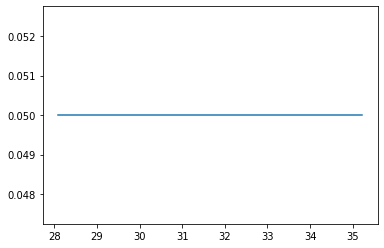

In [ ]:
plt.plot(cheerfulFpGraph)

In [ ]:
repartAllTables = cheerfulFpGraph.cumsum()

Text(0, 0.5, 'Probabilidade')

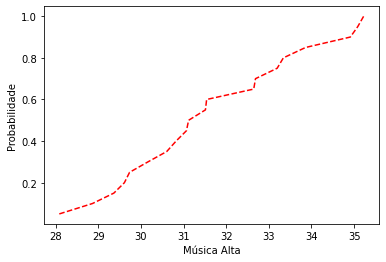

In [ ]:
plt.plot(repartAllTables, 'r--')
plt.xlabel('Música Alta')
plt.ylabel('Probabilidade')

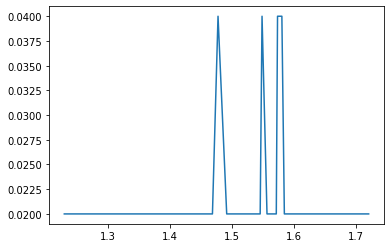

In [ ]:
# 2°: Trazendo dados apenas da tabela de 2020 (Ano de lançamento de Dynamite - BTS)

plt.plot(cheerfulFp)

In [ ]:
repart = cheerfulFp.cumsum()

Text(0, 0.5, 'Probabilidade')

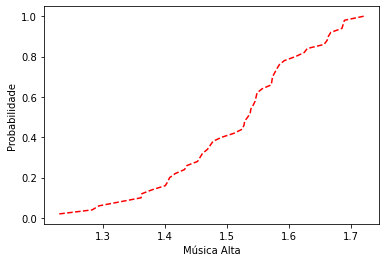

In [ ]:
plt.plot(repart, 'r--')
plt.xlabel('Música Alta')
plt.ylabel('Probabilidade')

Como dito no texto da explicação de Variaveis Aleatoria, o KPOP é conhecido por suas músicas animadas, videos com muitos efeitos visuais e coreografias sincronizadas.

https://www.vox.com/culture/2018/2/16/16915672/what-is-kpop-history-explained

Uma coisa muito interessante a se observar, é de que no primeiro gráfico, de Função probabilidade, apesar de nada amigavel de se analisar e ambar as ocasiões que ele foi trazido, em sua primeira ocorrencia ele pode ser uma linha reta, pois em todos os outros anos ele repete o caso do gráfico de 2020

Assim, como o caso do segundo grafico, onde os dado convergem.

# Covariância

In [ ]:
for num in range(23):
  if num > 13:
    if num == 14:
      year = 13
    twoten = songs['20'+str(year)]
    print("20"+str(year))
    print(twoten[['valence', 'cheerful']].cov())
    print("-----------------------------------|")

  if num != 0:
        year += 1

2013
           valence  cheerful
valence   0.044121  0.028407
cheerful  0.028407  0.047875
-----------------------------------|
2014
           valence  cheerful
valence   0.064478  0.057801
cheerful  0.057801  0.113003
-----------------------------------|
2015
           valence  cheerful
valence   0.051181  0.028289
cheerful  0.028289  0.049356
-----------------------------------|
2016
           valence  cheerful
valence   0.058448  0.048300
cheerful  0.048300  0.076864
-----------------------------------|
2017
           valence  cheerful
valence   0.037299  0.027526
cheerful  0.027526  0.047072
-----------------------------------|
2018
           valence  cheerful
valence   0.035724  0.028667
cheerful  0.028667  0.055615
-----------------------------------|
2019
           valence  cheerful
valence   0.035203  0.014889
cheerful  0.014889  0.028778
-----------------------------------|
2020
           valence  cheerful
valence   0.029735  0.006352
cheerful  0.006352  0.013266
-----

# Correlação

In [ ]:
for num in range(23):
  if num > 13:
    if num == 14:
      year = 13
    twoten = songs['20'+str(year)]
    print("20"+str(year))
    print(twoten[['valence', 'cheerful']].corr())
    print("-----------------------------------|")

  if num != 0:
        year += 1

2013
           valence  cheerful
valence   1.000000  0.618087
cheerful  0.618087  1.000000
-----------------------------------|
2014
          valence  cheerful
valence   1.00000   0.67715
cheerful  0.67715   1.00000
-----------------------------------|
2015
          valence  cheerful
valence   1.00000   0.56286
cheerful  0.56286   1.00000
-----------------------------------|
2016
           valence  cheerful
valence   1.000000  0.720606
cheerful  0.720606  1.000000
-----------------------------------|
2017
           valence  cheerful
valence   1.000000  0.656917
cheerful  0.656917  1.000000
-----------------------------------|
2018
           valence  cheerful
valence   1.000000  0.643142
cheerful  0.643142  1.000000
-----------------------------------|
2019
           valence  cheerful
valence   1.000000  0.467797
cheerful  0.467797  1.000000
-----------------------------------|
2020
           valence  cheerful
valence   1.000000  0.319832
cheerful  0.319832  1.000000
-----------

O Coeficiente de Correlação de Pearson tem as seguintes métricas:

* 0.9 para mais ou para menos indica uma correlação muito forte.
* 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
* 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
* 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
* 0 a 0.3 positivo ou negativo indica uma correlação desprezível.

É possível observar que a relação da música, de sua animação, energia pode sim ter influência na positividade que ela transmite. Não é o caso em todos os anos, ja que os dados variam, por exemplo, em 2020, ano marcado pela pandemia, a correlação fica mais proximo de 0.3, sendo considerada despresivel.

Contudo, no ano de 2016, ano de Olimpiada, Coreia ficou 8° melhor medalhista, de grandes premiações na Asia, como o MAMA (Mnet Asian Music Awards), esse numero foi de 0.72, sendo uma correlação forte!



---



Para a apresentação dos gráficos abaixo serão utilizados dados apenas de uma única tabela seperadamente, para melhor visualização e também para melhor manipulação dos dados.

Por agora, o ano escolhido foi o ano de 2021, por ser o mais proximo, mas também serão mostrado dados do ano de 2015/2016 :)

## Heatmap para correlação

In [ ]:
import seaborn as sns

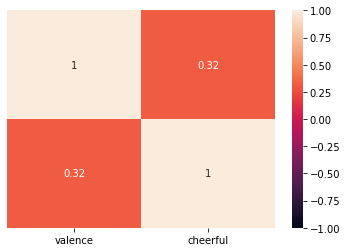

In [ ]:
songsCorr = songs['2020'][['valence', 'cheerful']].corr()
sns.heatmap(songsCorr, vmin = -1, vmax = +1, annot = True, yticklabels=False)

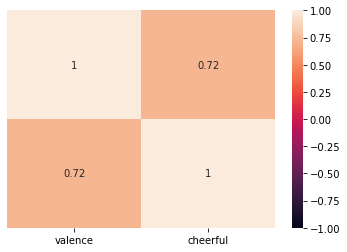

In [ ]:
songsCorr16 = songs['2016'][['valence', 'cheerful']].corr()
sns.heatmap(songsCorr16, vmin = -1, vmax = +1, annot = True, yticklabels=False)

# Estatística Descritiva

In [ ]:
import plotly.express as px

## Box Plot

In [ ]:
fig = px.box(songs['2021'], x='key', y='tempo', title='Key x Tempo')
fig.show()

Tempo em música é a duração de cada unidade de compasso, ou seja, também pode indicar a velocidade com que se executa determinado trecho da música. Em uma partitura, o tempo ritmico, é representado pela forma de um compasso musical ou pela assinatura do tempo, que é uma notação padrão usada para especificar *quantas batidas (pulsos) estão contidos em cada compasso*.

https://pt.wikipedia.org/wiki/Tempo_(m%C3%BAsica)

Key (tom) em música pode ter varios significados, como pode ser o intervalo na escala diatônica, também se refere a altura na escala geral dos sons (tom grave, tom agudo).

https://pt.wikipedia.org/wiki/Tom

http://www.equilibriumescola.com.br/o-que-e-tonalidade-aprenda-de-uma-vez-por-todas/



### Analise do Gráfico

Sabendo o que cada dado significa, então segundo o Box Plot é possível interpretar que músicas que tem Key == 6, ou seja, sexto grau musical mais presente (Lá) tendem a ter uma maior variabilidade de Tempo, ou seja, mais batidas por minuto, do que uma música de Key == 9 (Sol Maior).

https://www.descomplicandoamusica.com/graus-musicais/

Não compreendo muito de música, estou longe saber teoria musical, pelos dados mostrados no gráficos é possivel traçar uma suposição que música com intervalos (tempos em cada unidade compasso) mais complexos, tendem a ter tons (key) com notas de graus maiores.

## Histograma

In [ ]:
# ano que valencia nao tem relação com musica animadas
fig20 = px.histogram(songs['2020'], x = 'speechiness', marginal = 'rug')
fig20.show()

In [ ]:
# ano que valencia tem muita relação com musicas animadas
fig16 = px.histogram(songs['2016'], x = 'speechiness', marginal = 'rug')
fig16.show()

```
speechiness:
Presence of spoken words in a track. The more exclusively speech-like the recording, the closer to
1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values
between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered,
including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
```
Como fala a propria descrição dessa variavel dessa coluna, músicas geralmente apresentam um valor baixo de *speechiness*, o gráfico mostra que o valor mais presente entre 0.05 e 0.1 (que é abaixo de 0.33).

Segundo o estudo abaixo, de outro Dataset do Kaggle, que faz uma analise com dados semelhantes aos aqui presente, mas com uma tabela de dados de músicas populares do Spotify, o resultado que se é chegado é de que, geralmente, em músicas famosas: "*Liveness and Speechiness are still unanimously low*", ou seja, músicas "gostaveis", tem uma baixa taxa de *speechiness*. como mostrado nos gráficos acima.

https://towardsdatascience.com/what-makes-a-song-likeable-dbfdb7abe404


## Scatter plot

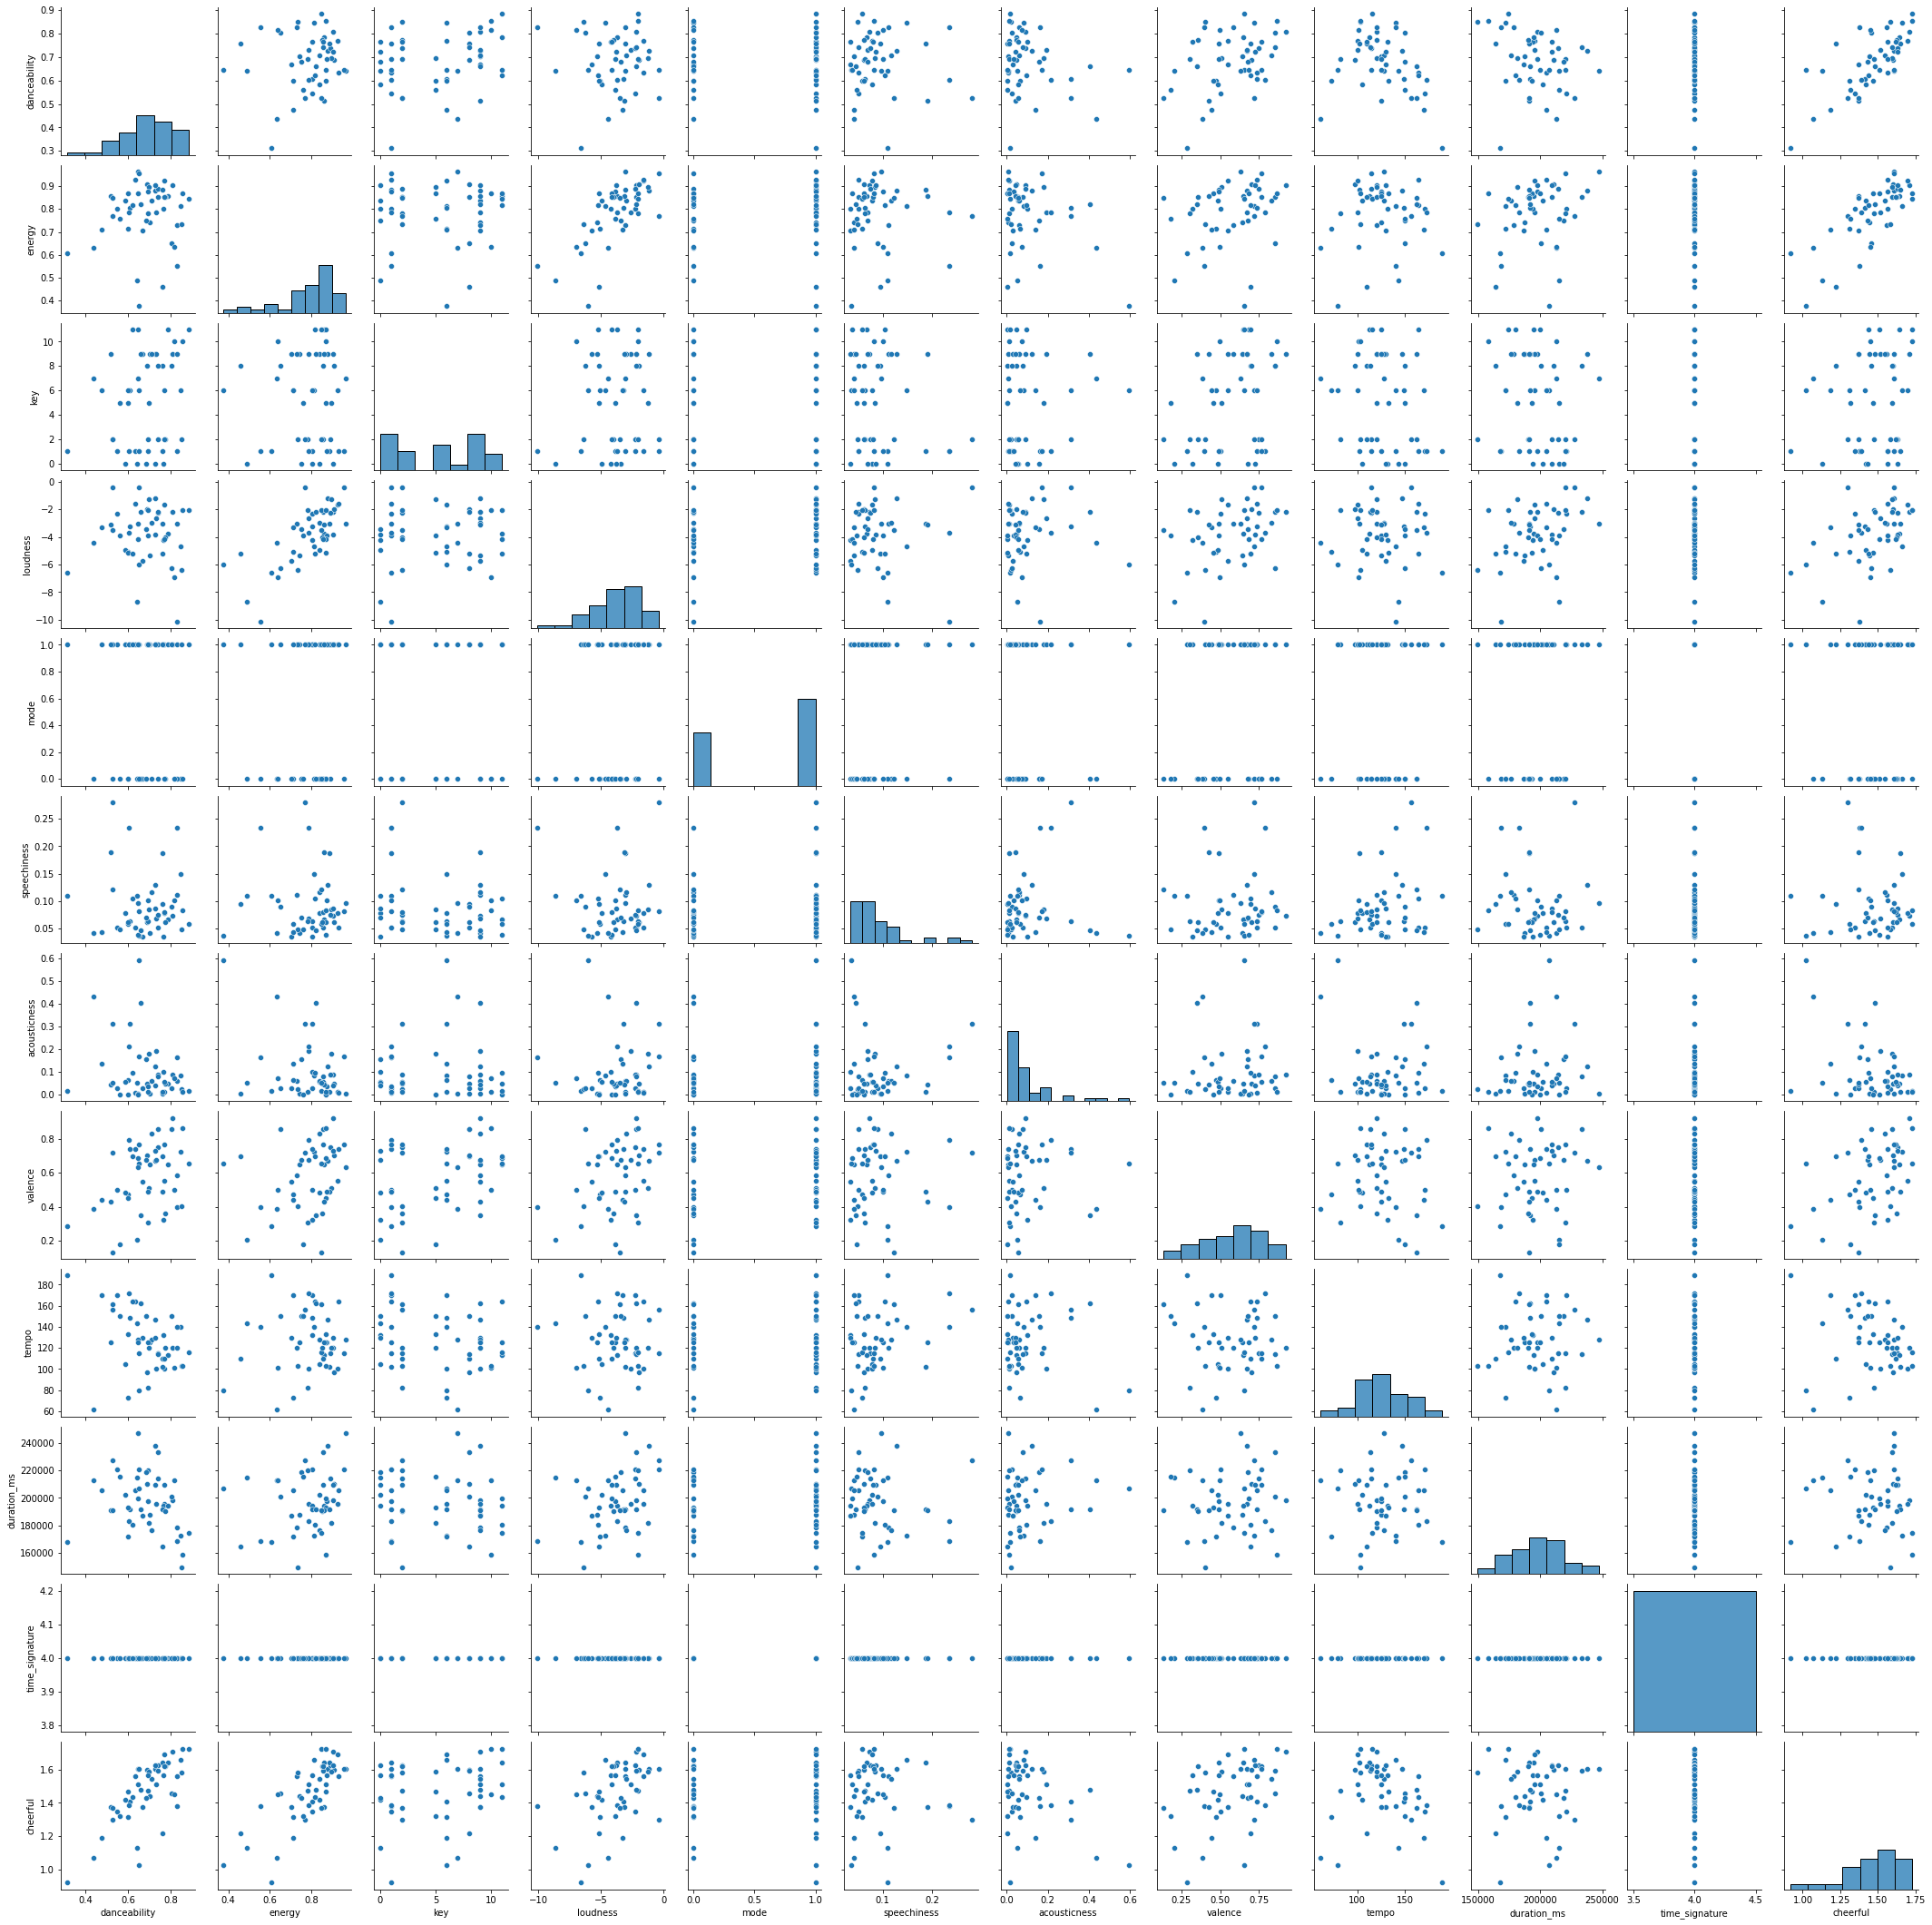

In [ ]:
col = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'cheerful']
sns.pairplot(songs['2021'][col])

A psicologia por traz da música e seus beneficios e impactos nunca foram segredos, e esse Scatter Plot está ai para provar!

Como mostra esse analise que foi citada anteriormente, que fala do que faz uma música ser "gostavél", traz casos que se repetem nessa analise aqui.
https://towardsdatascience.com/what-makes-a-song-likeable-dbfdb7abe404

As colunas analisadas aqui foram:

* danceability
* energy
* loudness
* speechiness
* acousticness
* valence
* tempo
* duration_ms
* key
* mode
* time_signature
* cheerful

No Scatter Plot é possivel ver que:
1. *danceability* tem proporcionalidade com *cheerful*, *loudness*, *valence* e *energy*
2. *time_signature* maioria dos dados tem esse valor igual a 4 (4/4)
3. *speechiness* e *acousticness* parecem ser muito proporcionais



# Normal Padrão

In [ ]:
# UTILS, TRATANDO DADOS

for num in range(23):
  if num == 0:
    year = 90
    nineties = songs[str(year)]
    nineties.drop(['title', 'artist/s'], axis=1, inplace=True)
  elif num > 0 and num < 11:
    if num == 1:
      year = 0
    twothousand = songs['200'+str(year)]
    twothousand.drop(['title', 'artist/s'], axis=1, inplace=True)
  else:
    twoten = songs['20'+str(year)]
    twoten.drop(['title', 'artist/s'], axis=1, inplace=True)
  if num != 0:
        year += 1


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ajuste = scaler.fit(songs['2021'])
normal = scaler.transform(songs['2021'])

normalpadrao = pd.DataFrame(normal)
normalpadrao.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.697749,0.660414,-2.610648,0.726909,-0.713662,0.782881,0.092186,-0.772145,0.619333,-0.616579,-1.602335,0.0,-1.381509
1,-1.628453,1.079915,0.913393,0.994155,0.823799,0.782881,-0.319830,-0.062670,1.812986,-0.246998,0.035620,0.0,1.323567
2,-1.559158,0.386454,0.722905,0.994155,1.341057,0.782881,0.735610,0.216471,0.493131,0.743076,1.989362,0.0,0.747435
3,-1.489862,0.172423,-0.372405,0.994155,-0.786753,0.782881,-0.888000,-0.754054,0.361672,-0.067449,-0.474514,0.0,-0.146941
4,-1.420566,1.405242,0.206998,0.192417,-0.457078,-1.277333,1.111881,-0.124883,0.761309,0.489111,-1.215836,0.0,1.043731


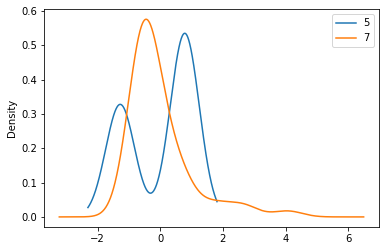

In [ ]:
normalpadrao[[5, 7]].plot(kind = 'kde')
# 5 == speechiness
# 7 == valence

In [ ]:
# DADOS DE 2016

ajuste15 = scaler.fit(songs['2015'])
normal15 = scaler.transform(songs['2015'])

normalpadrao15 = pd.DataFrame(normal15)
normalpadrao15.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.675247,0.617747,0.104228,0.164071,-0.325356,-1.314257,-0.897956,-0.674418,0.121387,-0.155017,-1.052342,0.267261,0.414324
1,-1.559712,0.302090,0.375567,-1.203186,0.484202,0.760886,-0.745088,-0.774945,-0.903656,0.269632,0.630139,0.267261,0.432637
2,-1.444178,-0.237851,0.291581,-1.476638,0.823023,0.760886,-0.374984,-0.835521,0.575463,-0.689352,-0.232335,0.267261,0.075540
3,-1.328644,-0.619962,0.717970,1.257876,0.576160,-1.314257,2.000113,-0.729643,0.220294,0.998605,1.767362,0.267261,0.167103
4,-1.213110,-1.226357,0.020243,0.984425,0.800034,0.760886,-1.083008,-0.559653,-1.780337,-1.459265,-0.180182,0.267261,-0.661545


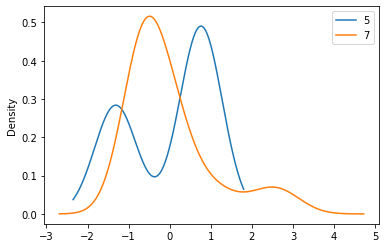

In [ ]:
normalpadrao15[[5, 7]].plot(kind = 'kde')
# 5 == speechiness
# 7 == valence

### Análise do Gráfico
É muito claro notar que o pico de valência (sentimento de positividade que a musica transmite) está ligado a quando uma música tem uma baixa em seu valor de speechiness como falado nas analises acima!



# Distribuição de Probabilidade

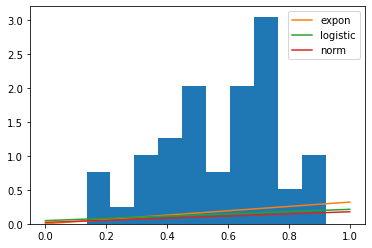

In [ ]:
import numpy as np
import scipy
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

size = 2
x = np.arange(size)
y = songs['2021']['valence'].values
h = plt.hist(y, density=True)

dist_names = ['expon', 'logistic', 'norm']

for dist_name in dist_names:
  dist = getattr(scipy.stats, dist_name)
  params = dist.fit(y)
  arg = params[:-2]
  loc = params[-2]
  scale = params[-1]

  if arg:
    pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale)
  else:
    pdf_fitted = dist.pdf(x, loc=loc, scale=scale)
  plt.plot(pdf_fitted, label=dist_name)

plt.legend(loc= 'upper right')

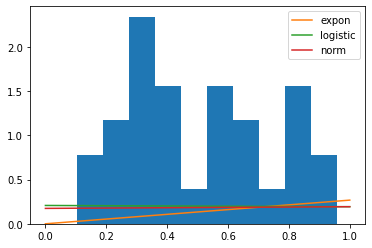

In [ ]:
size = 2
x = np.arange(size)
y = songs['2016']['valence'].values
h = plt.hist(y, density=True)

dist_names = ['expon', 'logistic', 'norm']

for dist_name in dist_names:
  dist = getattr(scipy.stats, dist_name)
  params = dist.fit(y)
  arg = params[:-2]
  loc = params[-2]
  scale = params[-1]

  if arg:
    pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale)
  else:
    pdf_fitted = dist.pdf(x, loc=loc, scale=scale)
  plt.plot(pdf_fitted, label=dist_name)

plt.legend(loc= 'upper right')

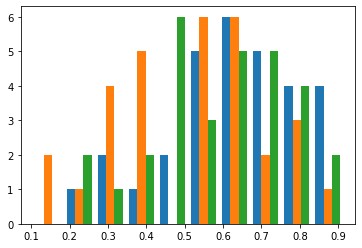

In [ ]:
from numpy import mean

amostra1 = songs['2013']['valence'].sample(n = 30, replace = True)
amostra2 = songs['2016']['valence'].sample(n = 30, replace = True)
amostra3 = songs['2020']['valence'].sample(n = 30, replace = True)

amostras = [amostra1, amostra2, amostra3]
media_amostras = [mean(amostras[index]) for index in range(len(amostras))]
plt.hist(amostras)
plt.show()

Escrevendo isso avisando que sei que passou da hora viu! Mas continuarei aqui para provar meu ponto de que BTS e KPOP e música podem trazer felicidade para sua vida, já que enquanto escrevo isso estou escutando a música mais feliz possível (Telepathy - BTS, 2020), mas agora vamos a analise da distribuição normal.

As populações escolhidas tiveram a mesma quantidades, mas de épocas diferentes como podes ver

```
azul == 2013
laranja == 2016
verde == 2020
```
Como é possivel ver, independente do ano, tendo BTS estreado ou estando entre os Hits ou não, a valência se mostra frequetemente acima da media. O ano de 2020 (ano que lançou Dynamite, boost de serotonina, felicidade em forma de música), tem sua valência em bons niveis, de 0.7 e 0.8 :)



# Conclusão



A industria do KPOP, que começou a crescer nos anos 90 com a valoração do mercado e da cultura nacional, é sem dúvida um dos maiores mercados que cresce no ramo do entretenimento hoje em dia. O impacto que BTS teve sobre essa industria e em seu país é algo inegavel, os dados aqui apresentados mostram que
não só, o KPOP é um genero musical que atrai por suas músicas animadas e felizes, mas por suas letras criticas e por se ter muito a aprender com a forma com que eles fazer mercado.


Claro, que a tabela é preenchida por diversos outros artistas incriveis do KPOP, mas o impacto que quero deixar aqui é tudo que BTS trouxe não so pra mim (que foi a minha motivação pra fazer esse trabalho), mas como toda a mudança que eles trouxeram com suas músicas e iniciativas. Que acredito que não sejam relevantes para sua avaliação aqui hehe, mas pra mim falar do que BTS me causa e que causa no mundo nunca é demais :>

De toda forma, escute BTS e coloque Pedrinho pra escutar BTS!

Aqui uma música bonita deles pra você:

https://www.youtube.com/watch?v=TbjUXK2M5n8

E Telepathy, que citei algumas várias vezes aqui :)

https://www.youtube.com/watch?v=OC29BN3R8dM

Em breve acho que vou te aperrear sobre um TCC com isso aqui.. eu me diverti bastante